# PARTE 2: Algoritmo Árvores de Decisão

Nesta segunda parte do Trabalho você irá aplicar os algoritmos de Árvore de Decisão e de Floresta Aleatória na base de dados de risco de crédito discutida em aula. Para isso você deve primeiramente importar as bibliotecas necessárias.

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# 1 - Importação dos dados Pré-Processados

a) importe o arquivo salvo como 'risco_credito.pkl'



In [36]:
import pickle
with open('risco_credito.pkl', 'rb') as f:
  X_risco_credito, y_risco_credito = pickle.load(f)

# 2 - Algoritmo de Árvore de Decisão



a) importar da biblioteca sklearn o pacote DecisionTreeClassifier

b) Calcule a árvore de decisão, utilizando como critério a entropia.
Coloque como nome da variável: arvore_risco_credito

c) Utilize o feature_importances_ para retornar a importância de cada atributo. Qual possui o maior ganho de informação?

d) Gere uma visualização da sua árvore de decisão utilizando o pacote tree da biblioteca do sklearn.

OBS: Adicione cores, nomes para os atributos e para as classes.

e) FAZER A PREVISÃO

Utilize .predict para fazer a previsão realizada no exemplo em sala.

   i. história boa, dívida alta, garantia nenhuma, renda > 35

   ii. história ruim, dívida alta, garantia adequada, renda < 15


Verifique nos slides se seu resultado está correto!

#3 - Algoritmo de Árvore de Decisão para uma base de dados maior (Credit Data)

Nesta seção você deverá testar o uso da Árvore de Decisão para a Base de Dados Credit Risk Dataset. Aqui estaremos analisando os clientes que pagam (classe 0) ou não pagam a dívida (classe 1), a fim do banco conceder empréstimo.

In [37]:
# abrir o arquivo com os dados do dataset Credit
import pickle
from sklearn.tree import DecisionTreeClassifier

with open('credit.pkl', 'rb') as f:
    X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

# treinar a árvore usando os dados carregados (treino)
arvore_credit = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_credit.fit(X_credit_treinamento, y_credit_treinamento)

print("Importâncias:", arvore_credit.feature_importances_)

# Verificação rápida de shapes
print('Shapes (treino X,y):', getattr(X_credit_treinamento, 'shape', None), getattr(y_credit_treinamento, 'shape', None))
print('Shapes (teste X,y):', getattr(X_credit_teste, 'shape', None), getattr(y_credit_teste, 'shape', None))

Importâncias: [0.21219711 0.39503611 0.39276678]
Shapes (treino X,y): (1500, 3) (1500,)
Shapes (teste X,y): (500, 3) (500,)


a) Ao abrir o arquivo utilize .shape para verificar o tamanho dos dados de treinamento e de teste

OBS: os dados de treinamento devem ter as seguintes dimenções: x=(1500, 3), y=(1500,); os dados de teste devem ter as seguintes dimenções: x=(500, 3), y=(500,)

b) Importe o pacote DecisionTreeClassifier do sklearn para treinar o seu algoritmo de árvore de decisão. Para poder refazer os testes e obter o mesmo resultado utilize o parâmetro random_state = 0.

c) Faça a previsão com os dados de teste. Visualize os dados e verifique se as previsões estão de acordo com os dados de teste (respostas reais).

d) Agora faça o cálculo da acurácia para calcular a taxa de acerto entre os valores reais (y teste) e as previsões

In [38]:
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support
import numpy as np

# Faz previsões sobre o conjunto de teste 
y_pred = arvore_credit.predict(X_credit_teste)

# Acurácia
acc = accuracy_score(y_credit_teste, y_pred)
print(f"Acurácia (teste): {acc:.4f}")



Acurácia (teste): 0.9820


e) Faça a análise da Matriz de Confusão.

i. Quantos clientes foram classificados corretamente que pagam a dívida?

ii. Quantos clientes foram classificados incorretamente como não pagantes?

iii. Quantos clientes foram classificados corretamente que não pagam?

iv. Quantos clientes foram classificados incorretamente como pagantes?

Matriz de Confusão:
[[430   6]
 [  3  61]]


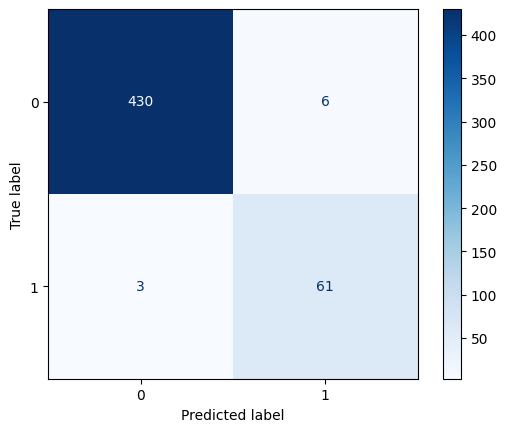

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Previsões
y_pred = arvore_credit.predict(X_credit_teste)

# Matriz de confusão
cm = confusion_matrix(y_credit_teste, y_pred)
print("Matriz de Confusão:")
print(cm)

# Exibir graficamente
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

f) Faça um print do parâmetro classification_report entre os dados de teste e as previsões. Explique qual é a relação entre precision e recall nos dados. Como você interpreta esses dados?

In [40]:
# Relatório de classificação
print("\nClassicação :")
print(classification_report(y_credit_teste, y_pred))



Classicação :
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



g) Gere uma visualização da sua árvore de decisão utilizando o pacote tree da biblioteca do sklearn.

OBS 1: Os atributos previsores são = ['income', 'age', 'loan']

OBS 2: Adicione cores, nomes para os atributos e para as classes. Você pode utilizar a função fig.savefig para salvar a árvore em uma imagem .png

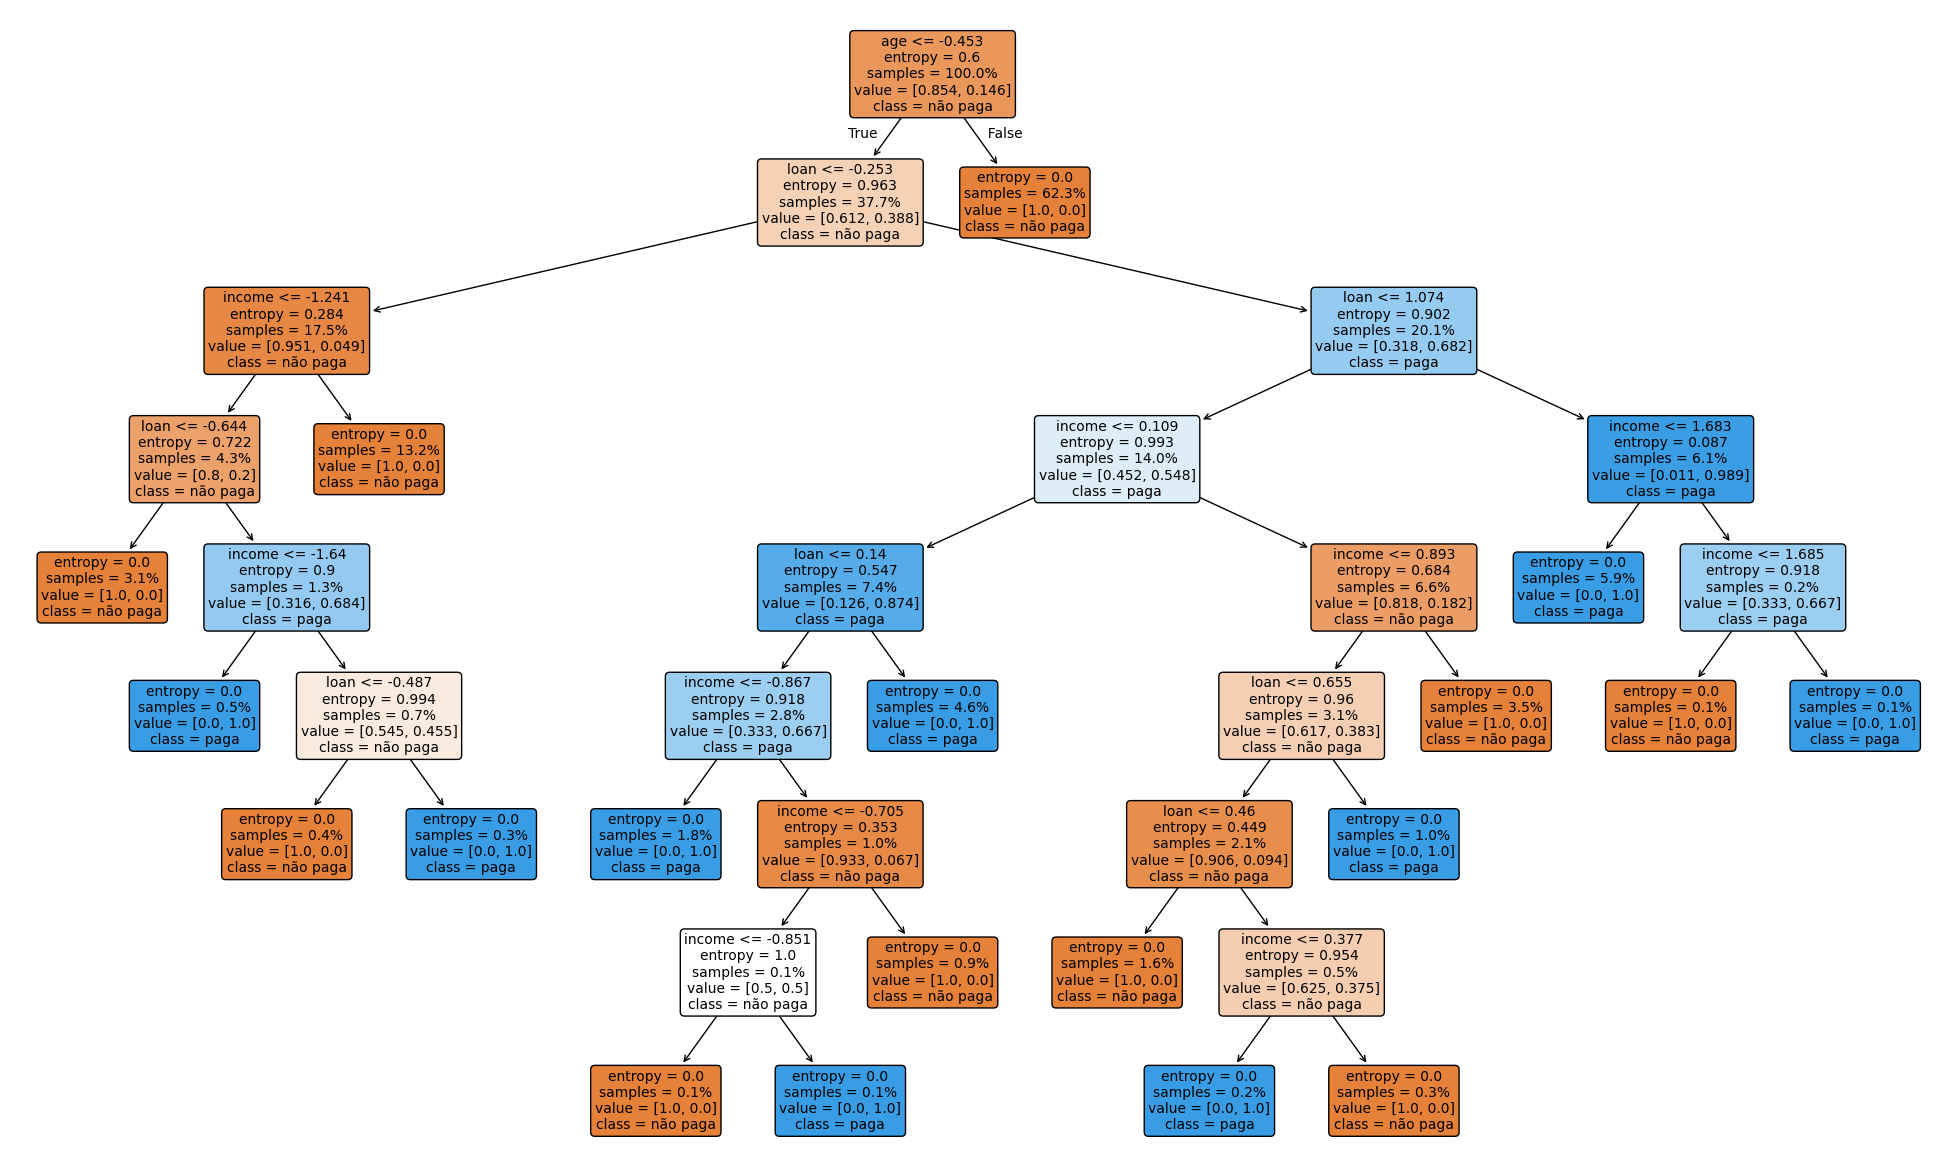

In [41]:
from sklearn import tree
# Define os nomes das features e das classes
feature_names = ['income', 'age', 'loan']
class_names = ['não paga', 'paga']

# Cria a figura
fig = plt.figure(figsize=(25, 15))

tree.plot_tree(
    arvore_credit,
    feature_names=['income', 'age', 'loan'],
    class_names=['não paga', 'paga'],
    filled=True,
    rounded=True,
    proportion=True,
    fontsize=10
)

# Mostra a figura
plt.show()

# Algoritmo Random Forest

Nesta seção iremos utilizar o algoritmo Random Forest para a mesma base de crédito (**Credit Risk Dataset**) - arquivo *credit.pkl*.

a) Importe o pacote RandomForestClassifier do sklearn para treinar o seu algoritmo de floresta randomica.

In [42]:
from sklearn.ensemble import RandomForestClassifier

b) Para gerar a classificação você deve adicionar alguns parâmetros:
*   n_estimators=10  --> número de árvores que você irá criar
*   criterion='entropy'
*   random_state = 0

In [43]:
floresta_credit = RandomForestClassifier(
    n_estimators=10,       # número de árvores
    criterion='entropy',   # métrica de divisão
    random_state=0         # garante reprodutibilidade
)

# Treina o modelo
floresta_credit.fit(X_credit_treinamento, y_credit_treinamento)

,n_estimators,10
,criterion,'entropy'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


c) Faça a previsão com os dados de teste. Visualize os dados e verifique se as previsões estão de acordo com os dados de teste (respostas reais).

In [44]:

y_pred = floresta_credit.predict(X_credit_teste)


print("Previsões do modelo (y_pred):")
print(y_pred[:20])  # mostra apenas as 20 primeiras previsões

print("\nValores reais (y_credit_teste):")
print(y_credit_teste[:20])  # mostra as 20 primeiras respostas reais


Previsões do modelo (y_pred):
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1]

Valores reais (y_credit_teste):
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1]


d) Agora faça o cálculo da acurácia para calcular a taxa de acerto entre os valores reais (y teste) e as previsões. O resultado foi melhor do que a árvore de decisão simples?

In [45]:
# Calcula a acurácia
acc_rf = accuracy_score(y_credit_teste, y_pred)

print(f"Acurácia do modelo Random Forest: {acc_rf:.4f}")

Acurácia do modelo Random Forest: 0.9680


e) Se o resultado foi inferior, como você poderia resolver isso? Quais foram os resultados obtidos? Se  aumentar o número de árvores, a acurácia pode melhorar um pouco mais.

f) Faça a análise da Matriz de Confusão.

Matriz de Confusão:
[[432   4]
 [ 12  52]]


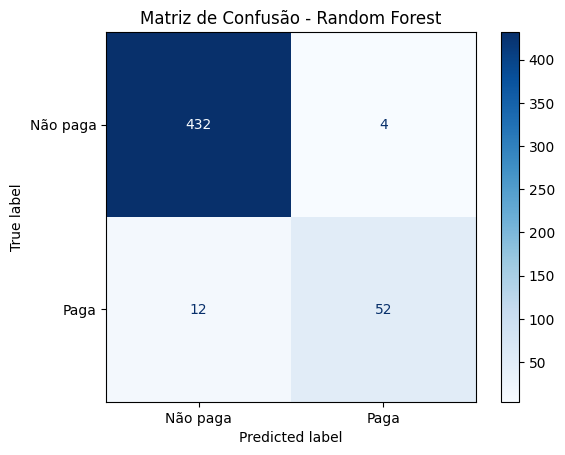

In [46]:
cm = confusion_matrix(y_credit_teste, y_pred)
print("Matriz de Confusão:")
print(cm)

# Exibir graficamente
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Não paga', 'Paga'])
disp.plot(cmap='Blues')
plt.title("Matriz de Confusão - Random Forest")
plt.show()

In [47]:
# Calcula diretamente usando os índices da matriz
precision = cm[1][1] / (cm[1][1] + cm[0][1])  
recall = cm[1][1] / (cm[1][1] + cm[1][0])     

print(f"Precision (Precisão): {precision:.2f}%")
print(f"Recall (Sensibilidade): {recall:.2f}%")

Precision (Precisão): 0.93%
Recall (Sensibilidade): 0.81%


g) Faça um print do parâmetro classification_report entre os dados de teste e as previsões. Explique qual é a relação entre precision e recall nos dados. Como você interpreta esses dados?

O modelo tem prefêrencia em ter mais certeza ante de aprovar um cliente, sacrificando um pouco do recall mas assim reduzindo o risco de emprestar a quem não vai pagar.